# Linear Regression

## กิจกรรมที่ 1 
จุดประสงค์: ให้ผู้เรียนทดลองคำนวณ Linear Regression ด้วยมือ

ให้ผู้เรียนเก็บข้อมูลที่เป็น Numerical data มา 2 อย่าง เช่น 
1. จำนวน Pokemon ต่อความหนาแน่นของเมือง (https://youtu.be/CtKeHnfK5uA)
2. จำนวน Muggle ในประเทศไทย ต่อพื้นที่/ความหนาแน่นของเมือง

ให้ลองคำนวณด้วยมือ หรือใช้ Excel ช่วยตามตัวอย่างข้างล่าง
https://github.com/reigngt09/MachineLearningFNE

## ระบบตัวอย่าง
ใช้ Python แสดงผลกราฟด้วย Matplotlib และ Plotly (วิธีการติดตั้ง https://plot.ly/python/getting-started/) ข้อมูลตัวอย่างใช้ Diabetes dataset (https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset) ซึ่งในการใช้งานจริง จะใช้ข้อมูลตัวอย่างที่นักเรียนน่าจะสนใจมากกว่านี้

In [1]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature (BMI)
diabetes_X2D = diabetes_X[:, np.newaxis, 2]
# Use only two feature (BMI and Average blood pressure)
diabetes_X3D = diabetes_X[:,[2, 3]]

## กิจกรรมที่ 2
จุดประสงค์: ให้ผู้เรียนสามารถอธิบายกระบวนการ Tune Parameters ของเทคนิค Linear Regression

ให้นักเรียนลองปรับค่า parameter ด้วยมือ เพื่อให้เห็นผลกระทบของ Parameter แต่ละตัว โดยเราจะใช้ data อื่น ที่น่าสนใจสำหรับเด็กกว่านี้ หรือให้นักเรียนสามารถอัพโหลดข้อมูลใส่ในกราฟของเราได้

### ส่วนที่ 1 
Linear Regression ที่มี 1 Independent Variable จึงต้องปรับ parameters 2 ตัว

In [3]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X2D[:-20]
diabetes_X_test = diabetes_X2D[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [4]:
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
@interact
def show_articles_more_than(m=1000, c=100):
    # Make predictions using the testing set
    regr.coef_[0] = m
    regr.intercept_ = c
    diabetes_y_pred = regr.predict(diabetes_X_test)

    plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
    plt.plot(diabetes_X_test, diabetes_y_pred, color='red', linewidth=3)

    plt.xlim=(-0.1, 0.15)
    plt.ylim=(0, 350)
    plt.title('BMI vs disease progression')
    plt.xlabel('Body mass index')
    plt.ylabel('Disease Progression')
    plt.show()
    return m, c

interactive(children=(IntSlider(value=1000, description='m', max=3000, min=-1000), IntSlider(value=100, descri…

### ส่วนที่ 2
Linear Regression ที่มี 2 Independent Variables จึงต้องปรับ parameters 3 ตัว

In [6]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X3D[:-20]
diabetes_X_test = diabetes_X3D[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [7]:
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
x1max, x2max = np.around(diabetes_X_train.max(axis=0), 2)
x1min, x2min = np.around(diabetes_X_train.min(axis=0), 2)

In [9]:
[a1, a2] = regr.coef_
d = regr.intercept_

x1max, x2max = np.around(diabetes_X_train.max(axis=0), 2)
x1min, x2min = np.around(diabetes_X_train.min(axis=0), 2)

# create x,y
xx, yy = np.meshgrid(np.linspace(x1min,x1max,10), np.linspace(x2min,x2max,10))

# calculate corresponding z
zz = a1*xx + a2*yy + d

In [10]:
import plotly.graph_objs as go

fig = go.FigureWidget(data=
                      [go.Scatter3d(x=diabetes_X_train[:,0], 
                                    y=diabetes_X_train[:,1] , 
                                    z=diabetes_y_train, 
                                    mode='markers',
                                    opacity=0.9),
                      go.Surface(x=xx, y=yy, z=zz, opacity=0.8)])

fig.update_traces(marker=dict(size=6,
                              line=dict(width=1, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.update_layout(title='BMI and average blood pressure vs disease progression',
                   scene = dict(
                       xaxis = dict(title='BMI'),
                       yaxis = dict(title='Average Blood Pressure'),
                       zaxis = dict(title='Disease Progression'),),
                  autosize=False,
                  width=800, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))
fig

FigureWidget({
    'data': [{'marker': {'line': {'color': 'DarkSlateGrey', 'width': 1}, 'size': 6},
          …

In [11]:
@interact
def show_articles_more_than(a1=139, a2=912, d=152):
    # Make predictions using the testing set
    zz = a1*xx + a2*yy + d
    bar = fig.data[1]
    bar.z = zz
    return 

interactive(children=(IntSlider(value=139, description='a1', max=417, min=-139), IntSlider(value=912, descript…

## กิจกรรมที่ 3
จุดประสงค์: ให้ผู้เรียนสามารถอธิบายผลกระทบของลักษณะ Data ที่มีต่อการสร้าง Linear Regression Model

#### **การสุ่มเลือกข้อมูล (Sampling Data)**

การเลือกข้อมูล หรือ sampling มีผลต่อ model ที่ได้ (เลือกใช้ข้อมูลที่ผู้เรียนน่าจะสนใจมากกว่านี้)

1. ให้เก็บตัวอย่างข้อมูลจากทุกกลุ่มข้อมูล (population) เพื่อไม่ให้ Model มี Bias หรือรู้จำรูปแบบของข้อมูลแค่บางประเภท  

In [53]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X2D[:-20]
diabetes_X_test = diabetes_X2D[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

@interact
def show_articles_more_than(groups=['A', 'B', 'C']):
    # Make predictions using the testing set
    # Train the model using the training sets
    if groups == 'A':
        idx = diabetes_X_train > -np.inf
        regr.fit(diabetes_X_train, diabetes_y_train)
    elif groups == 'B':
        idx = diabetes_X_train > 0.1
    else:
        idx = diabetes_X_train < -0.05
        
    regr.fit(diabetes_X_train[idx,np.newaxis], diabetes_y_train[idx.flatten()])
    
    # Make predictions using the testing set
    diabetes_y_pred = regr.predict(diabetes_X_test)

    # The coefficients
    print('Coefficients: ', regr.coef_[0])
    # The mean squared error
    print('Mean squared error: %.2f'
          % mean_squared_error(diabetes_y_test, diabetes_y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
          % r2_score(diabetes_y_test, diabetes_y_pred))

    # Plot outputs
    sc1 = plt.scatter(diabetes_X_train[idx,np.newaxis], diabetes_y_train[idx.flatten()],  color='black')
    sc2 = plt.scatter(diabetes_X_train[~idx,np.newaxis], diabetes_y_train[~idx.flatten()],  color='lightgray')
    sc3 = plt.scatter(diabetes_X_test, diabetes_y_test,  color='blue')
    
    plt.plot(diabetes_X_test, diabetes_y_pred, color='red', linewidth=3)

    sc1.set_label('Training data')
    sc2.set_label('Unknown data')
    sc3.set_label('Test data')
    
    plt.title('BMI vs disease progression in sampling bias settings')
    plt.xlabel('Body mass index')
    plt.ylabel('Disease Progression')
    plt.legend()
    plt.show()

interactive(children=(Dropdown(description='groups', options=('A', 'B', 'C'), value='A'), Output()), _dom_clas…

2. ระวังชุดข้อมูลที่มีปริมาณข้อมูลบางประเภทมากกว่าประเภทอื่น ๆ เป็นจำนวนมาก (Imbalanced Data)

Coefficients:  302.47565858317284
Mean squared error: 17300.97
Coefficient of determination: -2.58


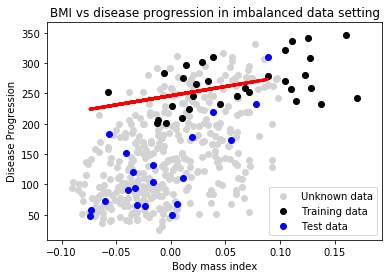

In [52]:
idx1 = np.where(np.bitwise_and(diabetes_X_train < 0.1, diabetes_y_train.reshape((-1,1)) > 200))[0]
idx2 = np.where(diabetes_X_train >= 0.1)[0]
idx = np.concatenate((idx1[:20], idx2))

regr.fit(diabetes_X_train[idx], diabetes_y_train[idx.flatten()])

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: ', regr.coef_[0])
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
sc2 = plt.scatter(diabetes_X_train, diabetes_y_train,  color='lightgray')
sc1 = plt.scatter(diabetes_X_train[idx], diabetes_y_train[idx.flatten()],  color='black')
sc3 = plt.scatter(diabetes_X_test, diabetes_y_test,  color='blue')

plt.plot(diabetes_X_test, diabetes_y_pred, color='red', linewidth=3)

sc1.set_label('Training data')
sc2.set_label('Unknown data')
sc3.set_label('Test data')

plt.title('BMI vs disease progression in imbalanced data setting')
plt.xlabel('Body mass index')
plt.ylabel('Disease Progression')
plt.legend()
plt.show()

## กิจกรรมที่ 4
จุดประสงค์: ให้ผู้เรียนทดลองใช้เครื่องมือ (Tools and Libraries) ในการสร้าง Linear Regression Model

ให้ทดลองใช้ Scikit-Learn (https://scikit-learn.org/stable/) ในการ Tune Parameters ของ Linear Regression โดย**อัตโนมัติ**

Coefficients:  938.2378612512637
Mean squared error: 2548.07
Coefficient of determination: 0.47


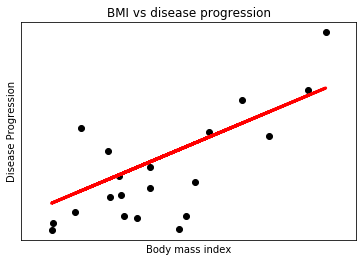

In [51]:
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: ', regr.coef_[0])
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.title('BMI vs disease progression')
plt.xlabel('Body mass index')
plt.ylabel('Disease Progression')
plt.show()

## กิจกรรมที่ 5
จุดประสงค์: ให้ผู้เรียนสามารถอธิบายข้อจำกัดของ Linear Regression Model ได้

1. เหมาะกับข้อมูลที่สัมพันธ์กันในรูปแบบ Linear เท่านั้น (Linear Regression Is Limited to Linear Relationships)

หาชุดข้อมูลที่แสดงให้เห็น limitation ถึงจุดนี้ แล้วให้นักเรียนลองหาค่า parameter ด้วยมือหรือ app ก็จะพบว่าได้คำตอบที่ไม่ค่อยแม่นยำ

2. Linear Regression มีการเปลี่ยนแปลงไวต่อค่าผิดปกติ หรือ Outliers (Sensitive to Outliers)

หาชุดข้อมูลที่แสดงให้เห็น limitation ถึงจุดนี้ แล้วให้นักเรียนลองหาค่า parameter ด้วยมือหรือ app ก็จะพบว่าได้คำตอบที่ไม่ได้สนใจ Outliers หรือไม่เหมาะกับข้อมูลส่วนใหญ่


## กิจกรรมที่ 6
จุดประสงค์: ให้ผู้เรียนทดลองใช้เทคนิค Linear Regression Model ในการแก้ปัญหาในชีวิตจริง

ให้นักเรียนตั้งโจทย์ เก็บข้อมูล แล้วทดลองใช้ Linear Regression ในการแก้ปัญหานั้น